In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dates = pd.date_range('1/1/2018', periods=11)
df = pd.DataFrame(
    {
        "Column A": ["1","2","3","4","5",np.nan,"7","8"],
        "Column B": [10,20,30,40,50,np.nan,70,80]
    }
)

In [3]:
df.describe()

,Column B
count,7.000000
mean,42.857143
std,25.634798
min,10.000000
25%,25.000000
50%,40.000000
75%,60.000000
max,80.000000


In [4]:
df = df.dropna()  # Drop all rows with NaNs

In [5]:
df.loc[4, "Column A"]  # Selects label 4 of Column A

'5'

In [6]:
# Does the same thing, but is considered bad practice
# since it performs two slice operations on the DataFrame.
# It's called "chaining".
df.loc[4]["Column A"]

'5'

In [7]:
df["Column B"] = df["Column B"].astype(int)
df["Column A"] = df["Column A"].astype(int)
# Here we convert our types to the proper values
# I think this is a false-positive warning, but I could be wrong

In [8]:
df.describe()
# Now Column A gets a proper description

,Column A,Column B
count,7.000000,7.000000
mean,4.285714,42.857143
std,2.563480,25.634798
min,1.000000,10.000000
25%,2.500000,25.000000
50%,4.000000,40.000000
75%,6.000000,60.000000
max,8.000000,80.000000


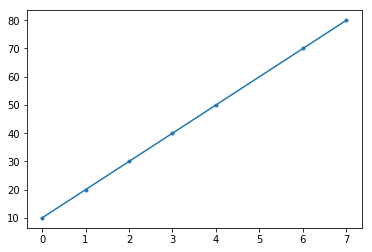

In [9]:
df["Column B"].plot(style='.-')  # Plots our data

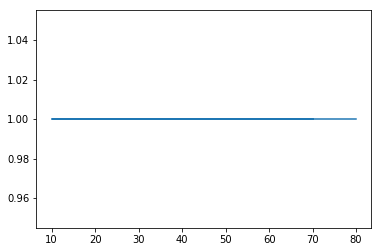

In [10]:
df["Column B"].value_counts().plot()
# Creates a flat line, because each value only occurs once

In [11]:
df = pd.read_csv('10000 Sales Records.csv')
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06


In [12]:
# Munging
df["Ship Date"] = pd.to_datetime(df["Ship Date"])
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Order ID"] = pd.to_numeric(df["Order ID"])
df["Units Sold"] = pd.to_numeric(df["Units Sold"])
df["Unit Price"] = pd.to_numeric(df["Unit Price"])
df["Unit Cost"] = pd.to_numeric(df["Unit Cost"])
df["Total Revenue"] = pd.to_numeric(df["Total Revenue"])
df["Total Cost"] = pd.to_numeric(df["Total Cost"])
df["Total Profit"] = pd.to_numeric(df["Total Profit"])

In [13]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,2011-01-27,292494523,2011-02-12,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,2015-12-28,361825549,2016-01-23,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,2011-01-13,141515767,2011-02-01,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,2012-09-11,500364005,2012-10-06,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,2015-10-27,127481591,2015-12-05,3491,47.45,31.79,165647.95,110978.89,54669.06


In [14]:
df = df.sort_values('Ship Date', ascending=True)

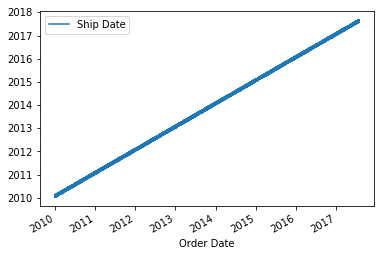

In [15]:
df.plot(x='Order Date', y='Ship Date')

In [16]:
# The ship date increases with the order date, who would have guessed?

In [25]:
grouped = df.groupby("Sales Channel")
grouped.groups

{'Offline': Int64Index([1937, 2455, 8517, 8856,  221, 3695, 4464, 2817, 4578, 7239,
             ...
             6401, 2892, 1930, 3027, 5498, 7513, 4348, 3234, 7434, 4709],
            dtype='int64', length=4939),
 'Online': Int64Index([9035, 5519, 7386, 7017,  979,  347, 8883, 3853, 5064, 1182,
             ...
             9927, 3474, 6639,  584, 6861, 3232, 9178, 5127, 9340, 2642],
            dtype='int64', length=5061)}

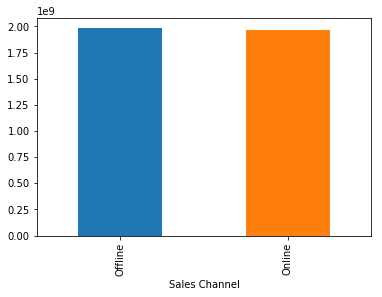

In [26]:
online_vs_offline = grouped.sum()
online_vs_offline["Total Profit"].plot(kind='bar')

In [27]:
# As we can see, profits from online orders are on par with offline orders

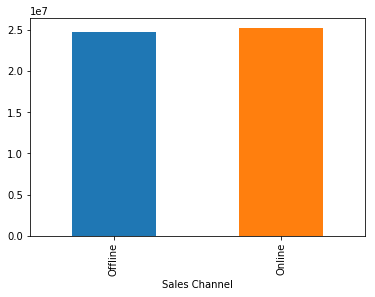

In [28]:
online_vs_offline["Units Sold"].plot(kind='bar')

In [29]:
# Same goes for total units sold

In [30]:
len(df["Country"].value_counts())
# Here we can see how many countries we've ordered from

185

In [31]:
len(df["Item Type"].value_counts())

12

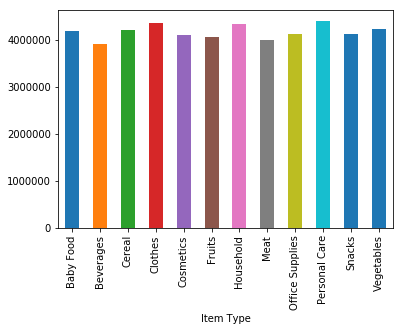

In [34]:
# Ah and we sell 12 types of items. I wonder which we sell the most of?
units_sold_data = df.groupby("Item Type").sum()["Units Sold"]
units_sold_data.plot(kind='bar')

In [53]:
# Hmm, hard to tell. Lets just get the top-seller.
units_sold_data.idxmax()

'Personal Care'

In [54]:
# The idxmax method just returns the index of the max value, nothing fancy